# Decision Tree Model Grid Search

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Set-up-Model-and-Gridsearch:" data-toc-modified-id="Set-up-Model-and-Gridsearch:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up Model and Gridsearch:</a></span></li><li><span><a href="#Run-the-Gridsearche:" data-toc-modified-id="Run-the-Gridsearche:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Run the Gridsearche:</a></span></li><li><span><a href="#Save-the-Gridsearch:" data-toc-modified-id="Save-the-Gridsearch:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the Gridsearch:</a></span></li><li><span><a href="#Analyse-Gridsearch-Results:" data-toc-modified-id="Analyse-Gridsearch-Results:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyse Gridsearch Results:</a></span></li><li><span><a href="#Analyse-Classification-Scores:" data-toc-modified-id="Analyse-Classification-Scores:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse Classification Scores:</a></span></li><li><span><a href="#Visualise:" data-toc-modified-id="Visualise:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visualise:</a></span></li></ul></div>

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import scikitplot as skplt

### Import Data:

In [3]:
# Filepaths / names:
y1_train_file = '../Data/y1_train_clean_processed.csv'
y1_test_file = '../Data/y1_test_clean_processed.csv'
X1_train_file = '../Data/X1_train_clean_processed.csv'
X1_test_file = '../Data/X1_test_clean_processed.csv'

In [4]:
y1_train = pd.read_csv(y1_train_file)

In [5]:
y1_test = pd.read_csv(y1_test_file)

In [6]:
X1_train = pd.read_csv(X1_train_file)

In [7]:
X1_test = pd.read_csv(X1_test_file)

### Set up Model and Gridsearch:

In [8]:
model4 = DecisionTreeClassifier()

In [9]:
params4 = {'criterion': ['gini', 'entropy'],
          'max_depth': [5,10,15,20,30,None]}

In [10]:
gs_model4 = GridSearchCV(estimator=model4,
                   param_grid=params4,
                   cv=5,
                   scoring='f1_macro',
                   n_jobs=-2,
                   return_train_score=True,verbose=6)

### Run the Gridsearche:

In [11]:
gs_model4.fit(X1_train, y1_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done  50 out of  60 | elapsed:  4.7min remaining:   56.6s
[Parallel(n_jobs=-2)]: Done  60 out of  60 | elapsed:  5.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 30, None]},
             return_train_score=True, scoring='f1_macro', verbose=6)

### Save the Gridsearch:

In [12]:
joblib.dump(gs_model4, '../Model_Save_Files/Decision_Tree_Grid_Search_4.jlib')

['../Model_Save_Files/Decision_Tree_Grid_Search_4.jlib']

### Analyse Gridsearch Results:

In [13]:
print(gs_model4.best_estimator_)
print(gs_model4.best_score_)
print(gs_model4.score(X1_train, y1_train))

DecisionTreeClassifier(criterion='entropy', max_depth=15)
0.8280401129481685
0.8438188555099838


In [14]:
gs_model4.best_params_

{'criterion': 'entropy', 'max_depth': 15}

### Analyse Classification Scores:

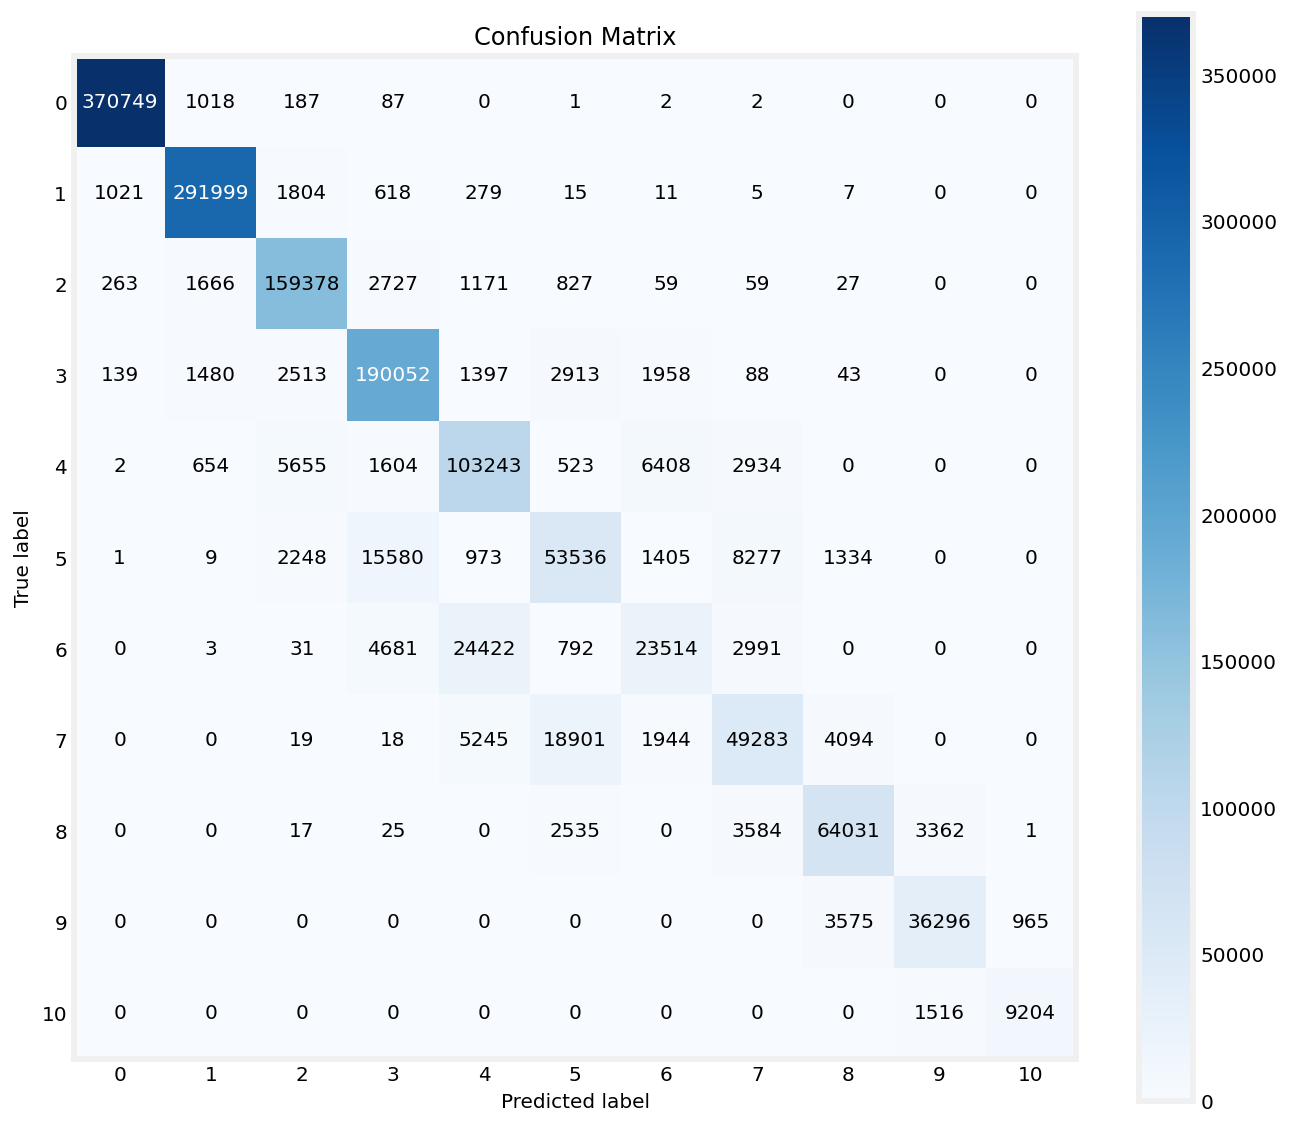

In [15]:
# Confusion Matrix
best_RF = gs_model4.best_estimator_
predictions_test4 = best_RF.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test,predictions_test4,labels=[0,1,2,3,4,5,6,7,8,9,10],figsize=(10,10))
plt.show()

In [16]:
# Cross Validation Score
cvs4 = cross_val_score(best_RF, X1_test, y1_test, cv=5)
print(cvs4.mean())

0.8974493333333333


In [17]:
# Accuracy, Precision and Recall
predictions_train4 = best_RF.predict(X1_train)

print(classification_report(y1_train, predictions_train4))
print(classification_report(y1_test, predictions_test4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    868106
           1       0.99      0.99      0.99    690106
           2       0.94      0.97      0.95    387747
           3       0.89      0.96      0.92    468026
           4       0.77      0.87      0.82    282387
           5       0.69      0.66      0.68    194514
           6       0.71      0.45      0.55    131678
           7       0.75      0.64      0.69    185511
           8       0.88      0.88      0.88    171628
           9       0.89      0.90      0.90     95284
          10       0.92      0.88      0.90     25013

    accuracy                           0.91   3500000
   macro avg       0.86      0.84      0.84   3500000
weighted avg       0.91      0.91      0.91   3500000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    372046
           1       0.98      0.99      0.99    295759
           2       0.93 

In [18]:
# Precision Recall and ROC Curves
probabilities4_train = best_RF.predict_proba(X1_train)
probabilities4_test = best_RF.predict_proba(X1_test)

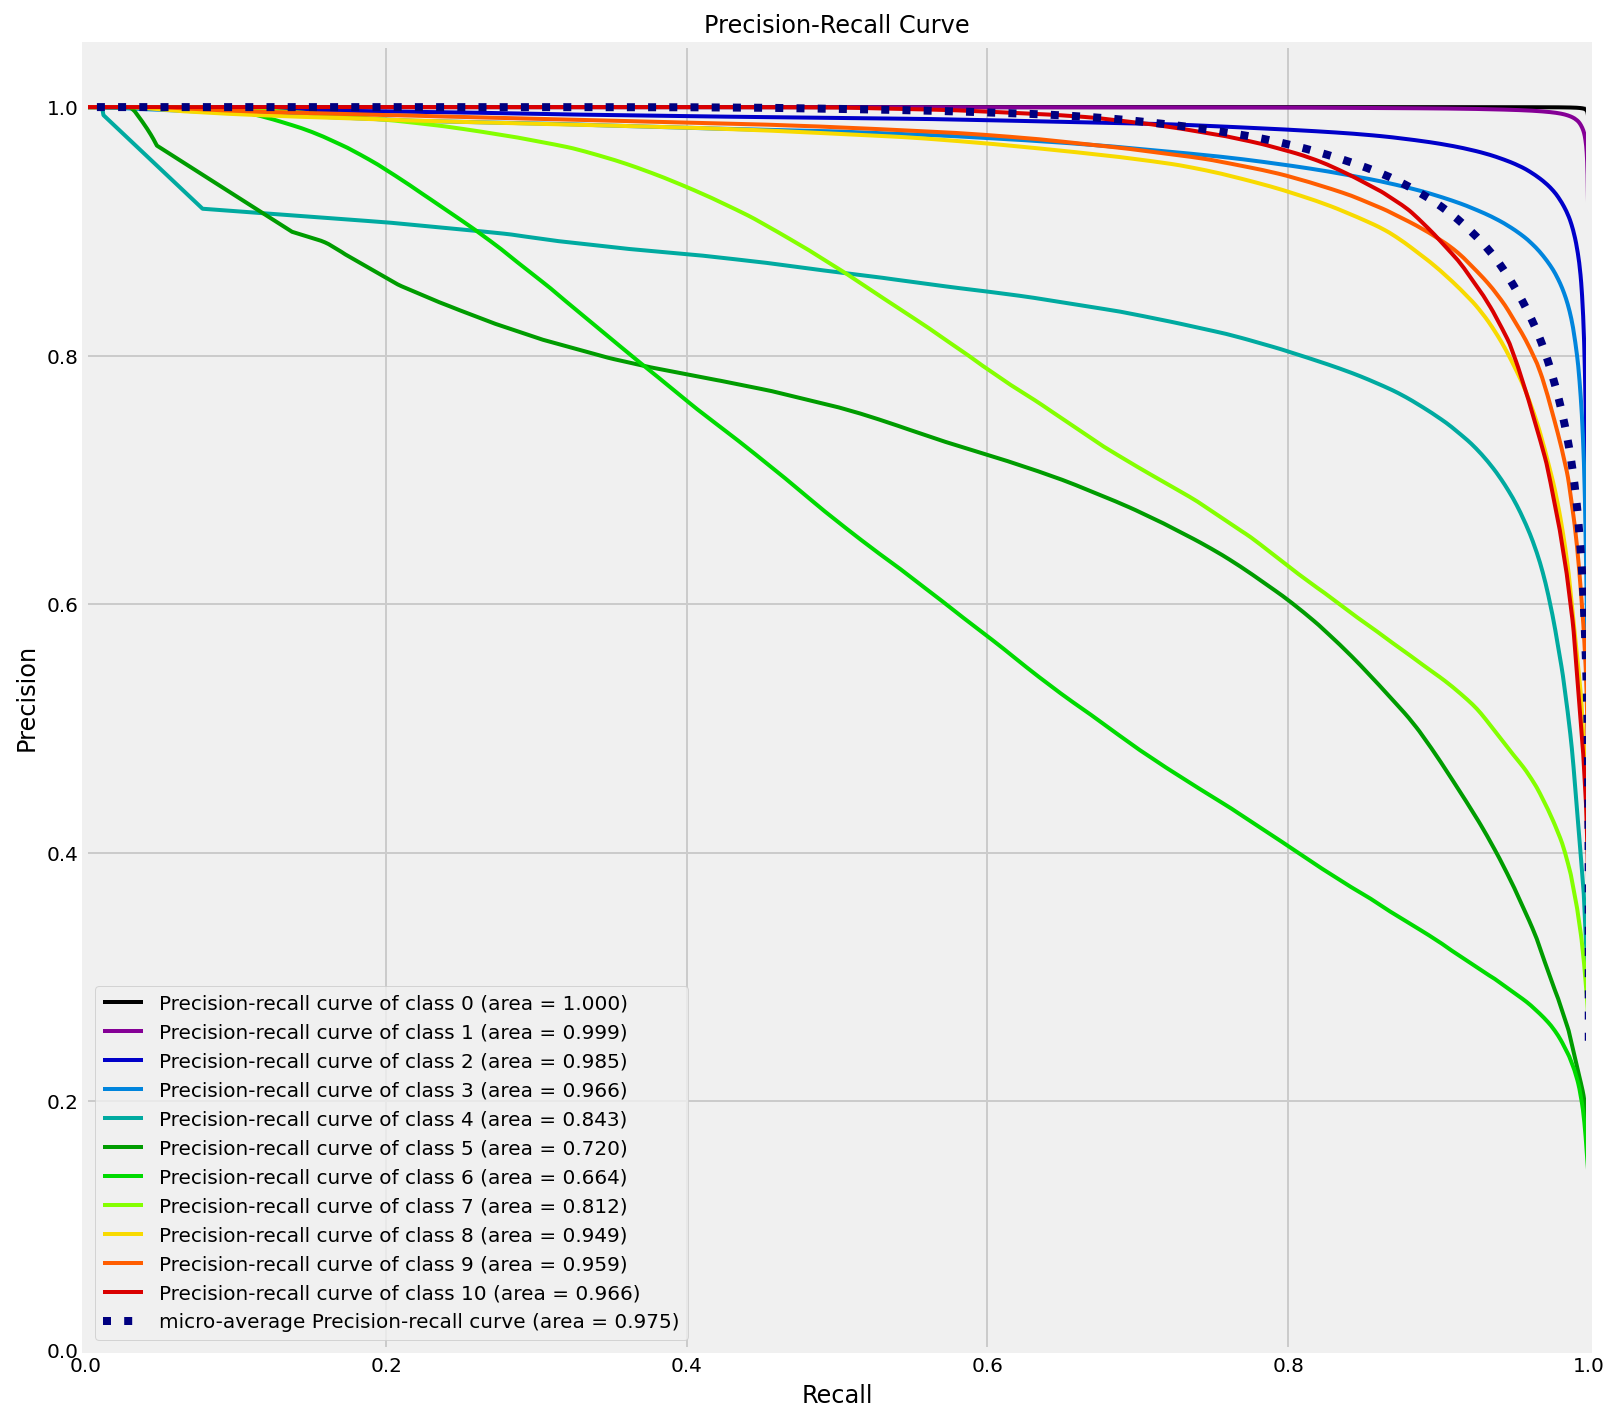

In [19]:
skplt.metrics.plot_precision_recall(y1_train, probabilities4_train,figsize=(12,12))
plt.show()

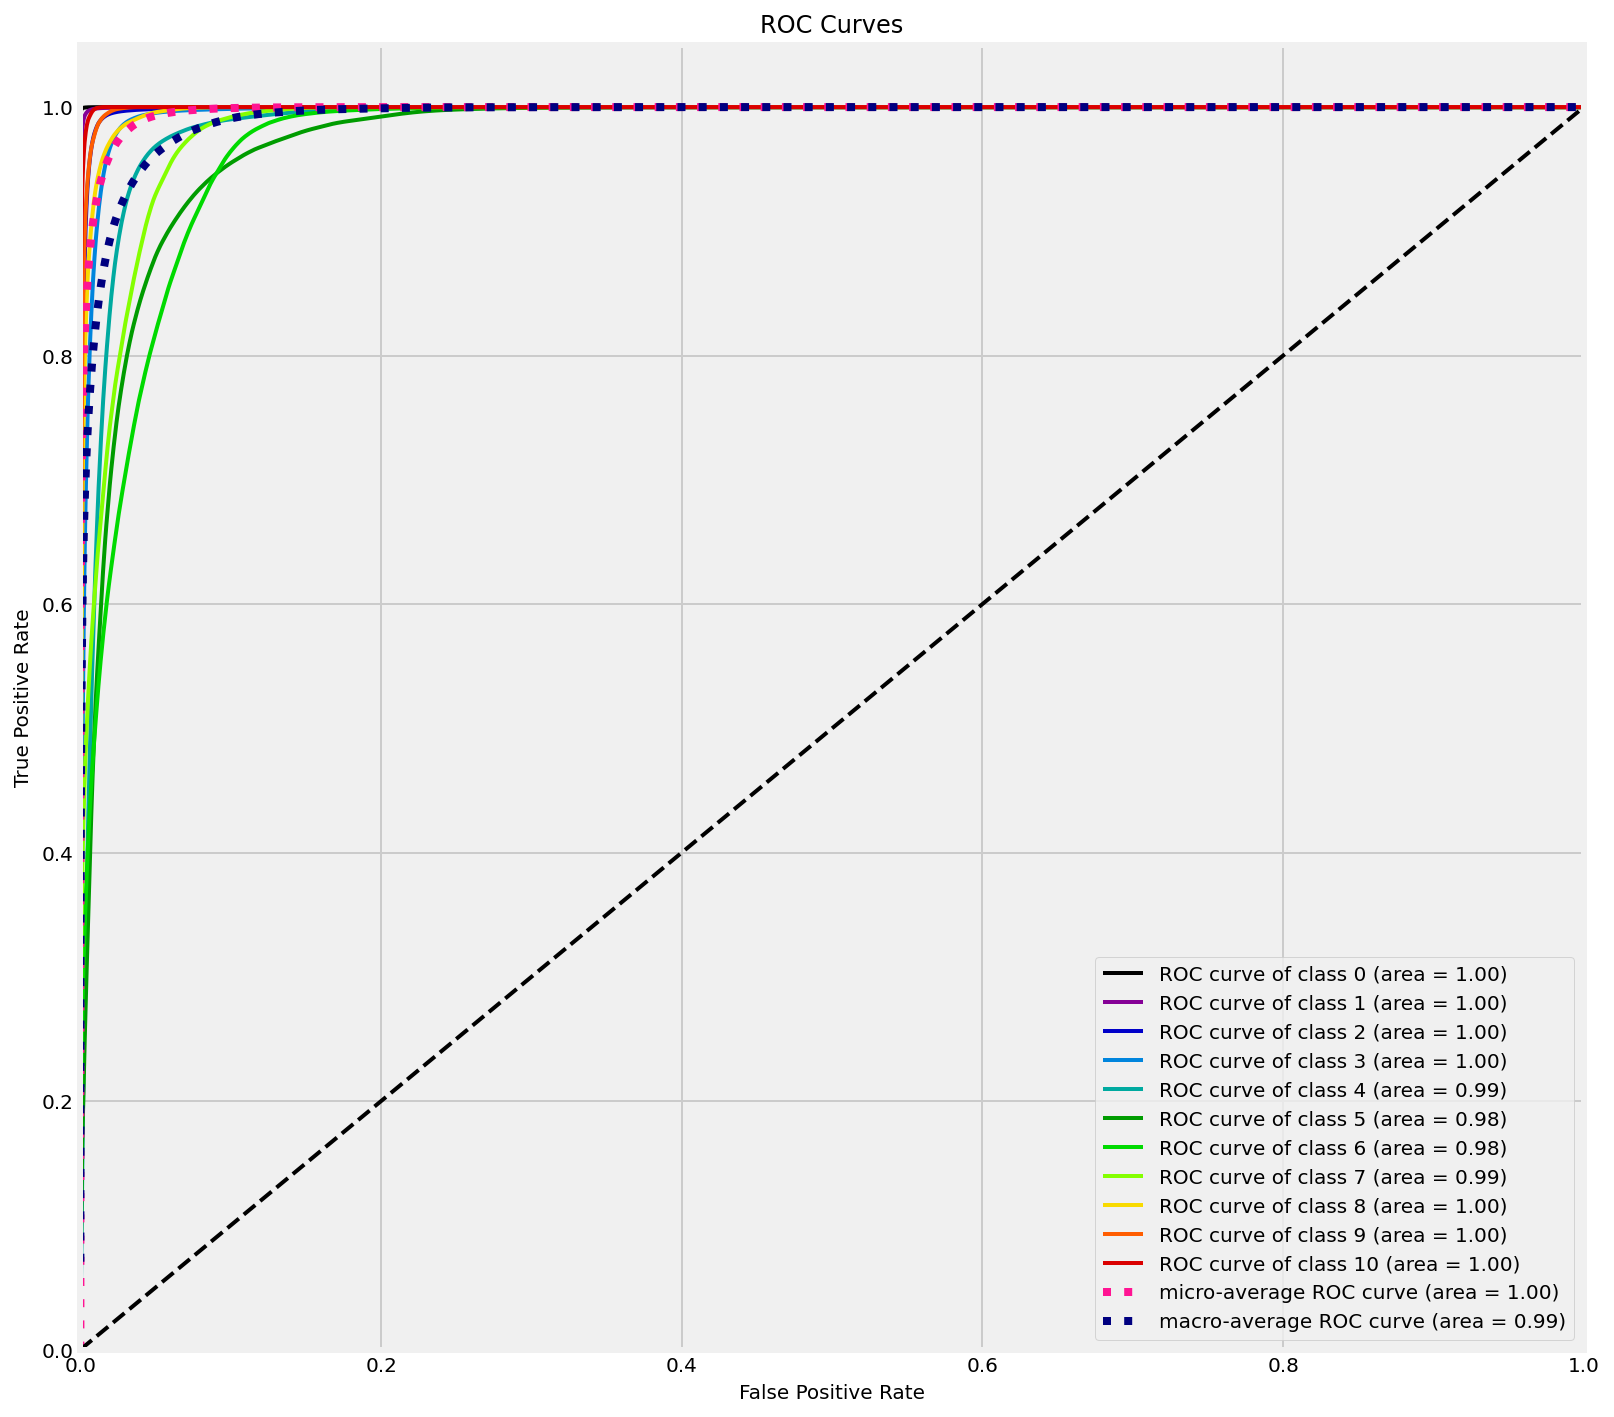

In [20]:
skplt.metrics.plot_roc(y1_train, probabilities4_train,figsize=(12,12))
plt.show()

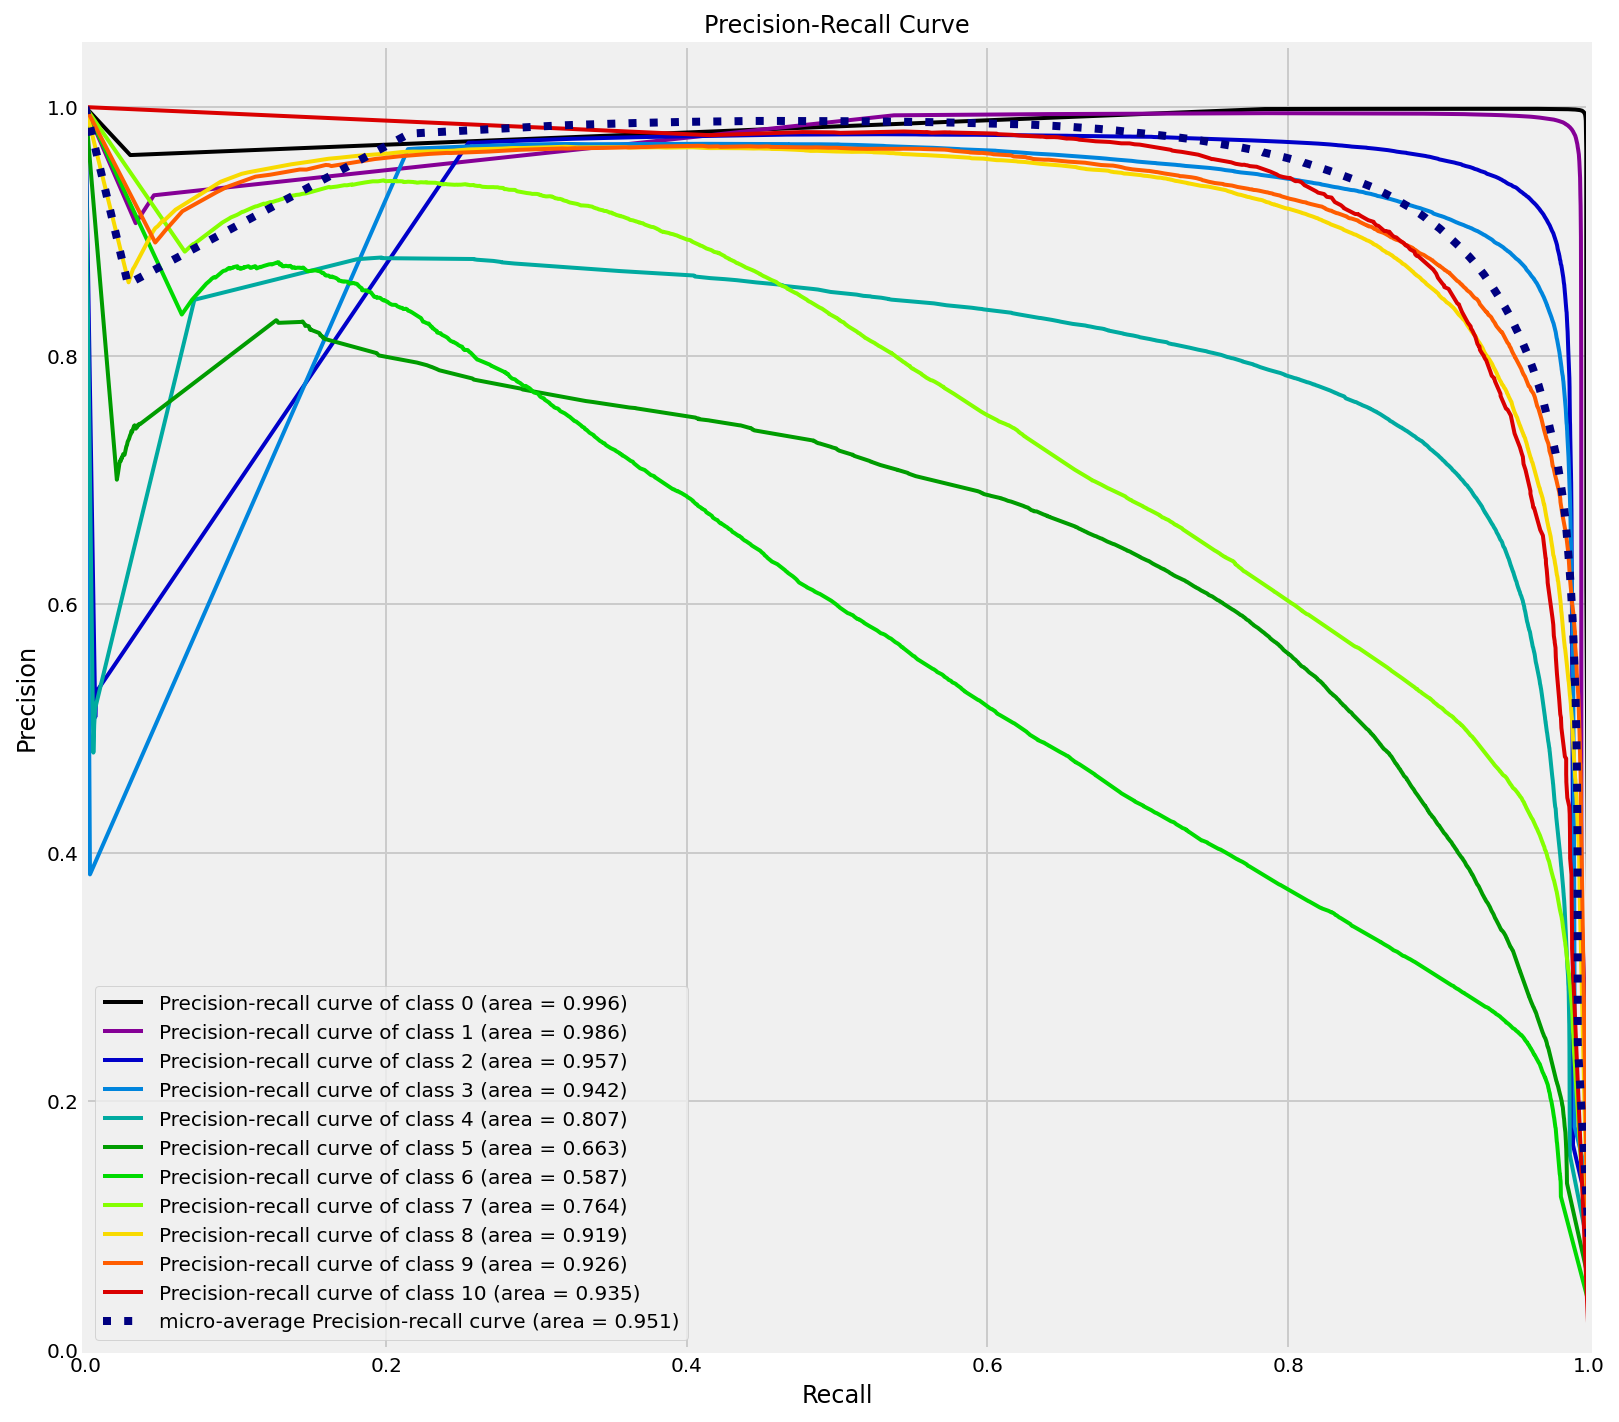

In [21]:
skplt.metrics.plot_precision_recall(y1_test, probabilities4_test,figsize=(12,12))
plt.show()

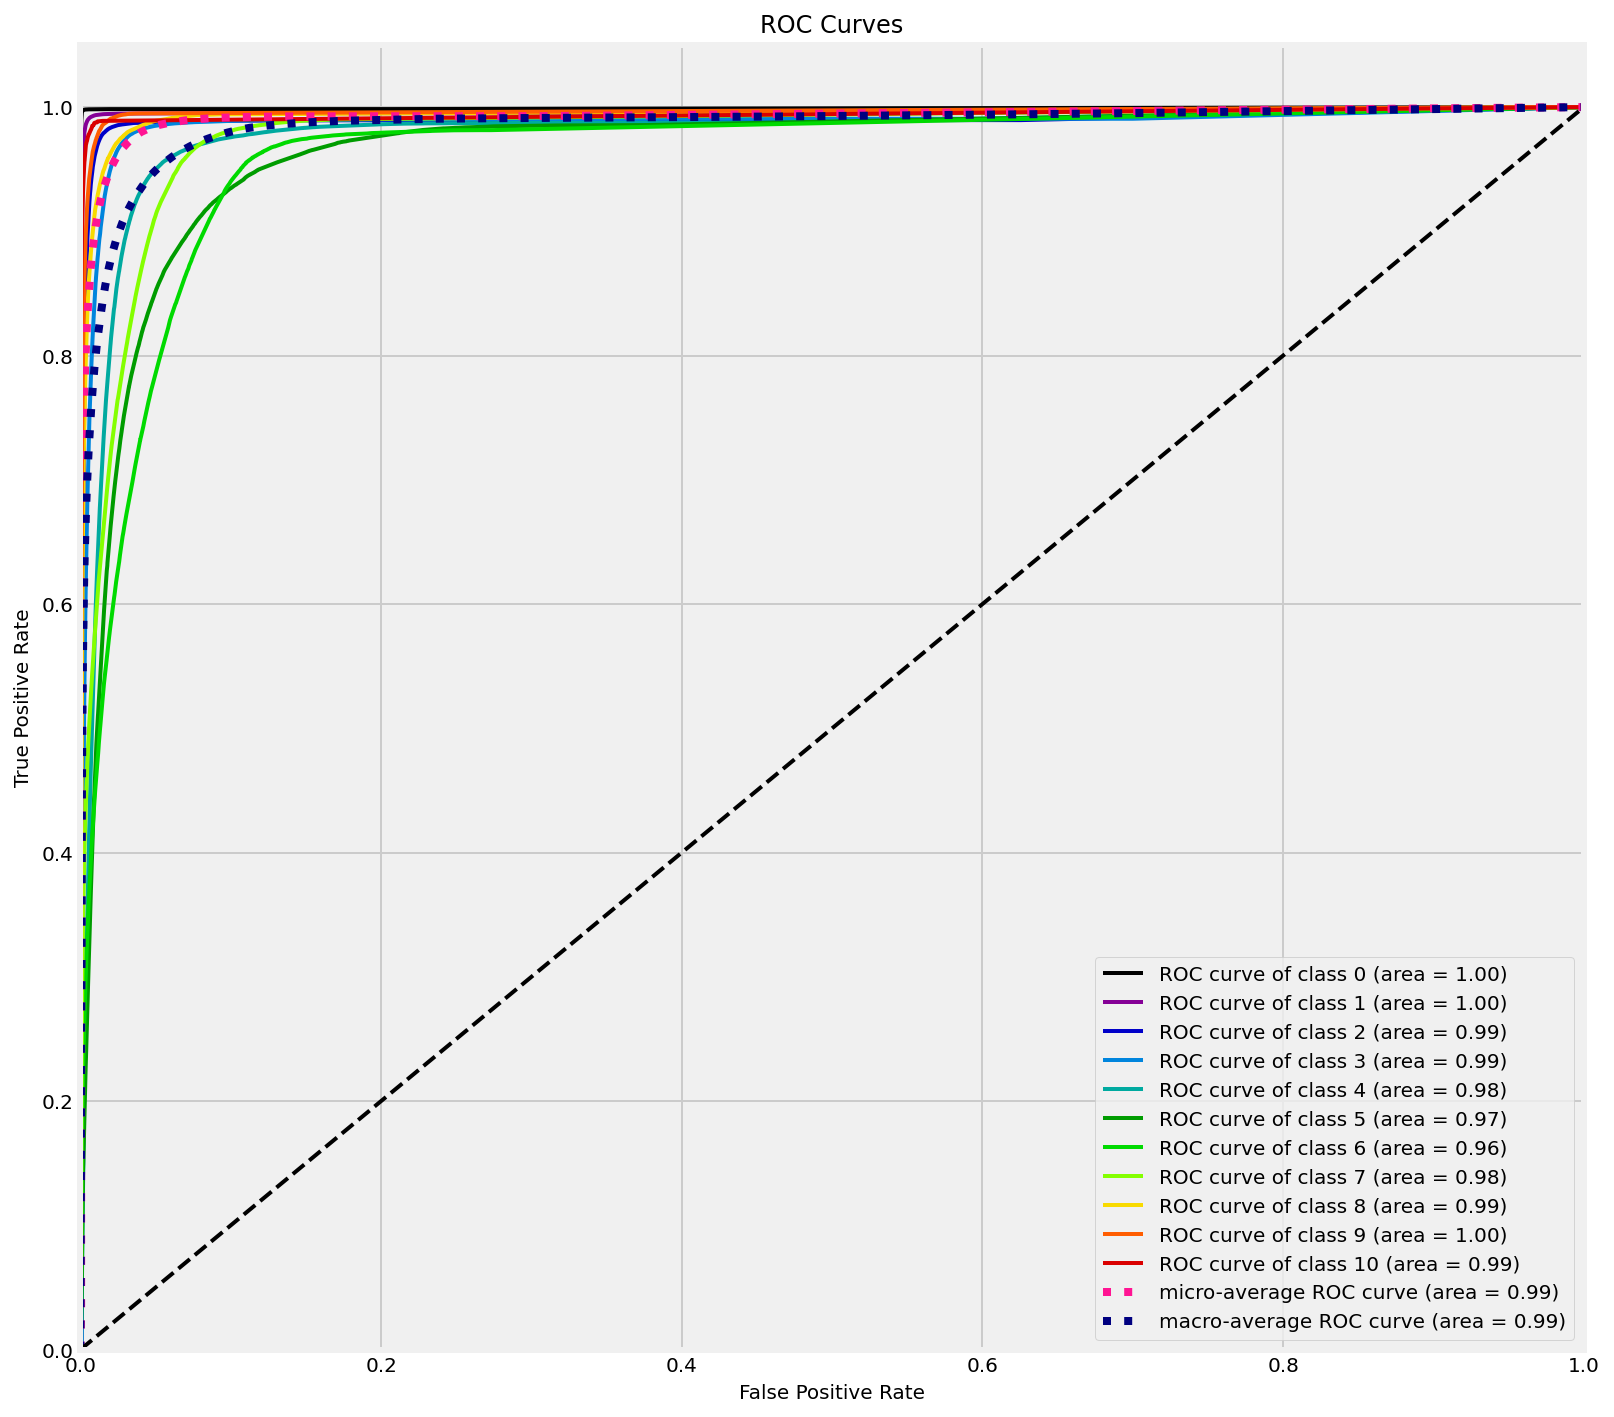

In [22]:
skplt.metrics.plot_roc(y1_test, probabilities4_test,figsize=(12,12))
plt.show()